<a href="https://colab.research.google.com/github/Sudhanshu20004-9/AI-tech-Lab1/blob/main/Aita_Lab_5_2_input_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: I want a code to make a 2-input X-OR gate with neural network with Multi layer perseptron by back propogation.

import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output dataset
y = np.array([[0], [1], [1], [0]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights0 = 2 * np.random.random((2, 3)) - 1
weights1 = 2 * np.random.random((3, 1)) - 1

# Training parameters
epochs = 10000
learning_rate = 0.1

# Training the neural network
for i in range(epochs):
  # Forward propagation
  layer0 = X
  layer1 = sigmoid(np.dot(layer0, weights0))
  layer2 = sigmoid(np.dot(layer1, weights1))

  # Calculate the error
  layer2_error = y - layer2

  # Backpropagation
  layer2_delta = layer2_error * sigmoid_derivative(layer2)
  layer1_error = layer2_delta.dot(weights1.T)
  layer1_delta = layer1_error * sigmoid_derivative(layer1)

  # Update weights
  weights1 += layer1.T.dot(layer2_delta) * learning_rate
  weights0 += layer0.T.dot(layer1_delta) * learning_rate

# Test the neural network
print("Output after training:")
print(layer2)


Output after training:
[[0.09082085]
 [0.91110857]
 [0.9121265 ]
 [0.51135469]]


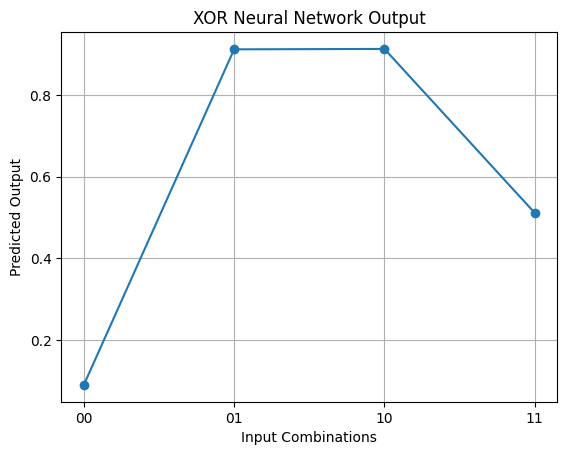

In [3]:
# prompt: Give me visual graph for the above output.

import matplotlib.pyplot as plt

# Assuming 'layer2' is the output of your neural network after training
# and it contains the predicted values for the XOR problem.

# Extract the predicted values
predicted_output = layer2.flatten()

# Create a list of input combinations (00, 01, 10, 11)
input_combinations = ['00', '01', '10', '11']

# Plot the results
plt.plot(input_combinations, predicted_output, marker='o')
plt.xlabel('Input Combinations')
plt.ylabel('Predicted Output')
plt.title('XOR Neural Network Output')
plt.grid(True)
plt.show()


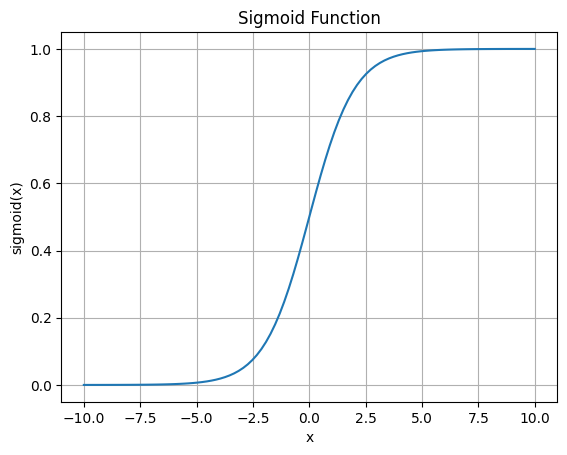

In [4]:
# prompt: Now give me the code for sigmoid function graph for the above output

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Generate x values for the sigmoid function
x = np.linspace(-10, 10, 100)

# Calculate the corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()


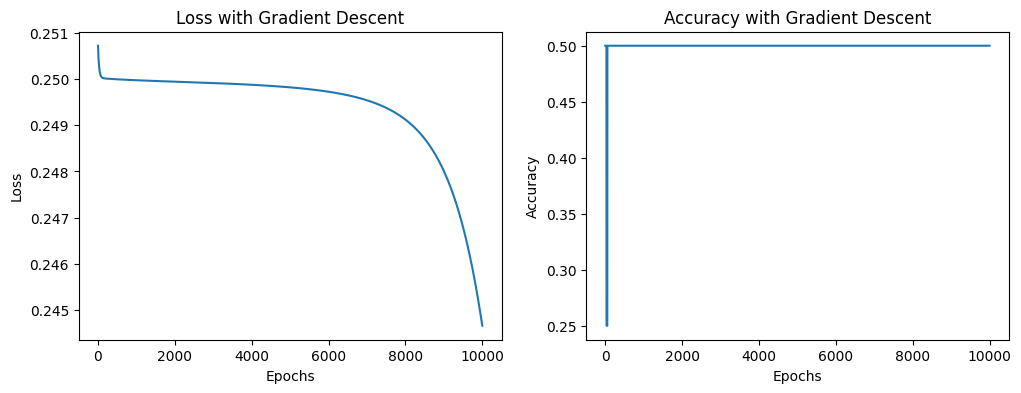

Output after training with Gradient Descent:
[[0.51265819]
 [0.45716102]
 [0.56021471]
 [0.47718465]]


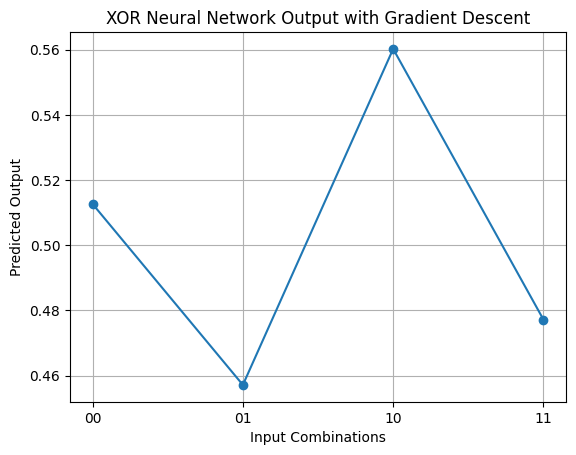

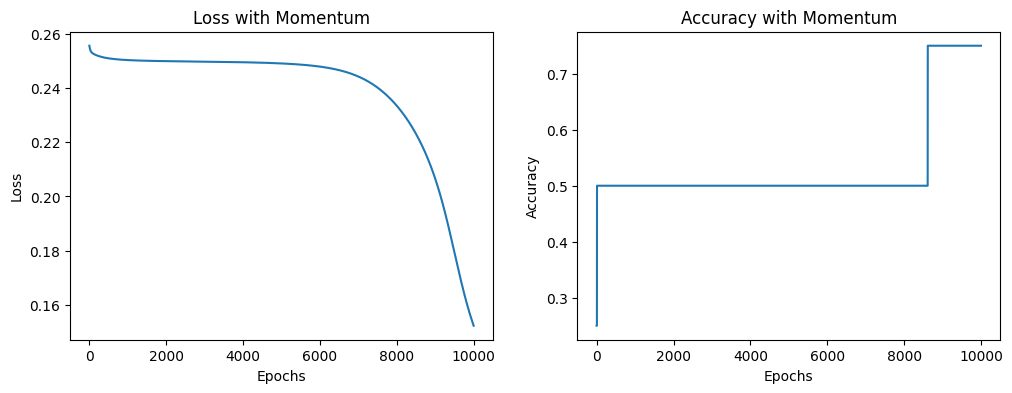

Output after training with Momentum:
[[0.6044365 ]
 [0.63820798]
 [0.74103703]
 [0.21363508]]


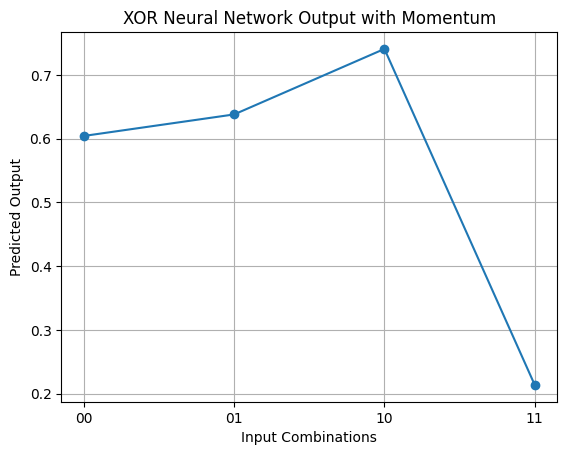

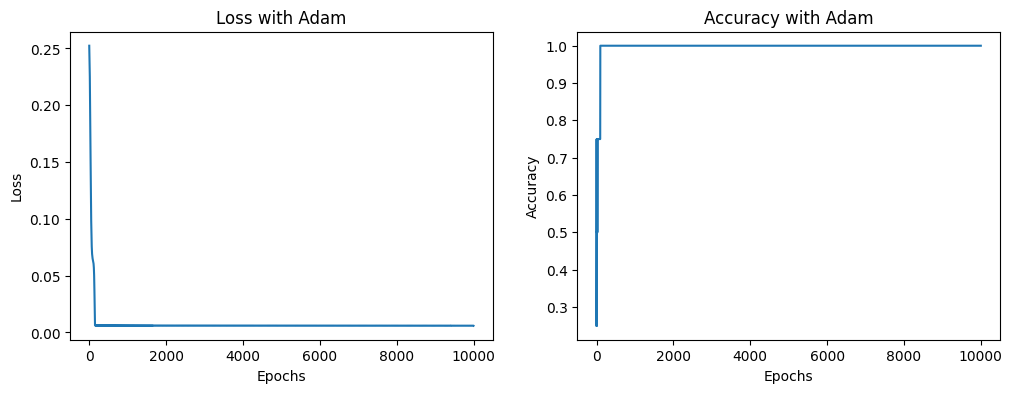

Output after training with Adam:
[[4.97590952e-06]
 [9.65570640e-01]
 [8.82928346e-01]
 [9.29583154e-02]]


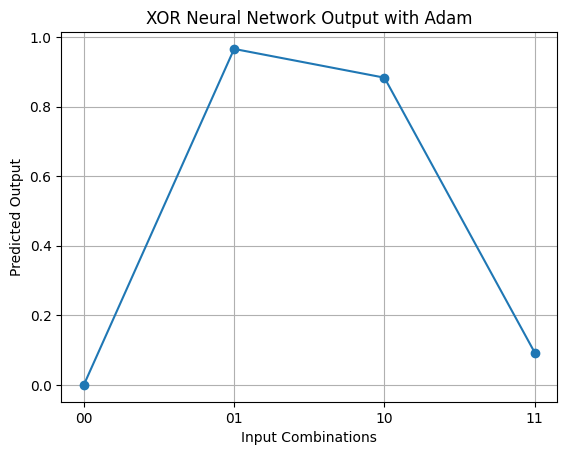

In [5]:
# prompt: Now implement the above using different optimizers with their accuracy and loss graph

import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output dataset
y = np.array([[0], [1], [1], [0]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights0 = 2 * np.random.random((2, 3)) - 1
weights1 = 2 * np.random.random((3, 1)) - 1

# Training parameters
epochs = 10000
learning_rate = 0.1

# Function to calculate mean squared error
def mse(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

# Function to train the neural network with a specific optimizer
def train_with_optimizer(optimizer_name, optimizer_func):
  global weights0, weights1
  weights0 = 2 * np.random.random((2, 3)) - 1
  weights1 = 2 * np.random.random((3, 1)) - 1

  losses = []
  accuracies = []

  for i in range(epochs):
    # Forward propagation
    layer0 = X
    layer1 = sigmoid(np.dot(layer0, weights0))
    layer2 = sigmoid(np.dot(layer1, weights1))

    # Calculate the error
    layer2_error = y - layer2

    # Backpropagation
    layer2_delta = layer2_error * sigmoid_derivative(layer2)
    layer1_error = layer2_delta.dot(weights1.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # Update weights using the specified optimizer
    weights1 = optimizer_func(weights1, layer1, layer2_delta, learning_rate)
    weights0 = optimizer_func(weights0, layer0, layer1_delta, learning_rate)

    # Calculate loss and accuracy
    loss = mse(y, layer2)
    losses.append(loss)
    accuracy = np.mean((layer2 > 0.5) == y)
    accuracies.append(accuracy)

  return losses, accuracies, layer2


# Define different optimizer functions
def gradient_descent(weights, input_layer, delta, learning_rate):
  return weights + input_layer.T.dot(delta) * learning_rate

def momentum(weights, input_layer, delta, learning_rate, momentum_factor=0.9):
  velocity = 0
  velocity = momentum_factor * velocity + input_layer.T.dot(delta) * learning_rate
  return weights + velocity

def adam(weights, input_layer, delta, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
  m = 0
  v = 0
  m = beta1 * m + (1 - beta1) * input_layer.T.dot(delta)
  v = beta2 * v + (1 - beta2) * np.square(input_layer.T.dot(delta))
  m_hat = m / (1 - beta1)
  v_hat = v / (1 - beta2)
  return weights + learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

# Train the neural network with different optimizers
optimizers = {
    "Gradient Descent": gradient_descent,
    "Momentum": momentum,
    "Adam": adam
}

for optimizer_name, optimizer_func in optimizers.items():
  losses, accuracies, layer2 = train_with_optimizer(optimizer_name, optimizer_func)

  # Plot the loss and accuracy graphs
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(losses)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'Loss with {optimizer_name}')

  plt.subplot(1, 2, 2)
  plt.plot(accuracies)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title(f'Accuracy with {optimizer_name}')

  plt.show()

  print(f"Output after training with {optimizer_name}:")
  print(layer2)

  # Assuming 'layer2' is the output of your neural network after training
  # and it contains the predicted values for the XOR problem.

  # Extract the predicted values
  predicted_output = layer2.flatten()

  # Create a list of input combinations (00, 01, 10, 11)
  input_combinations = ['00', '01', '10', '11']

  # Plot the results
  plt.plot(input_combinations, predicted_output, marker='o')
  plt.xlabel('Input Combinations')
  plt.ylabel('Predicted Output')
  plt.title(f'XOR Neural Network Output with {optimizer_name}')
  plt.grid(True)
  plt.show()


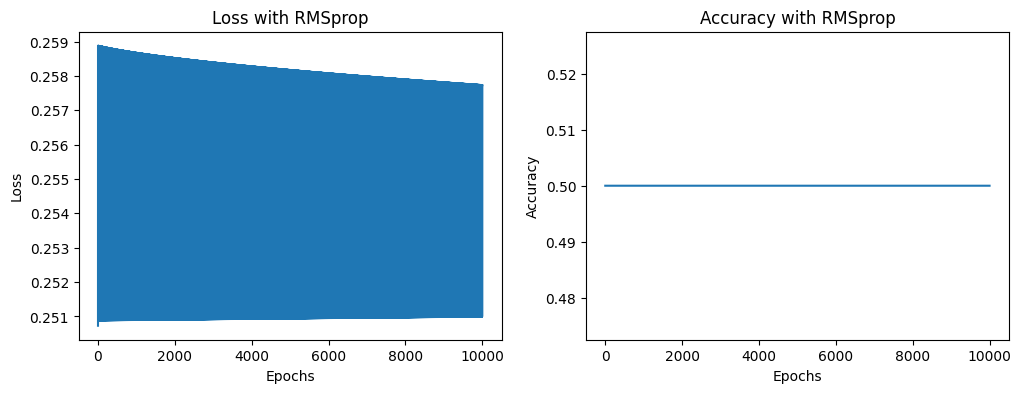

Output after training with RMSprop:
[[0.41972803]
 [0.40622131]
 [0.41897774]
 [0.40571219]]


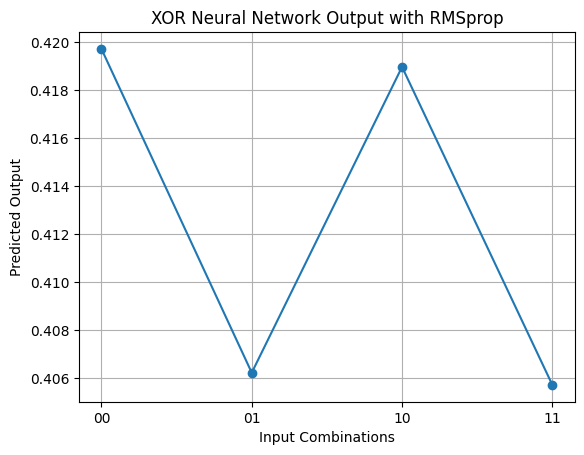

Final Accuracy with RMSprop: 50.00%


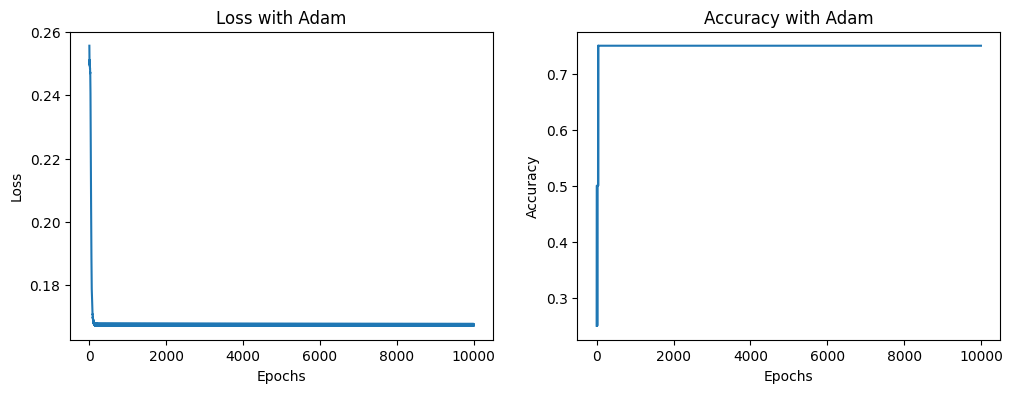

Output after training with Adam:
[[0.66895737]
 [0.67380925]
 [0.66406931]
 [0.04192279]]


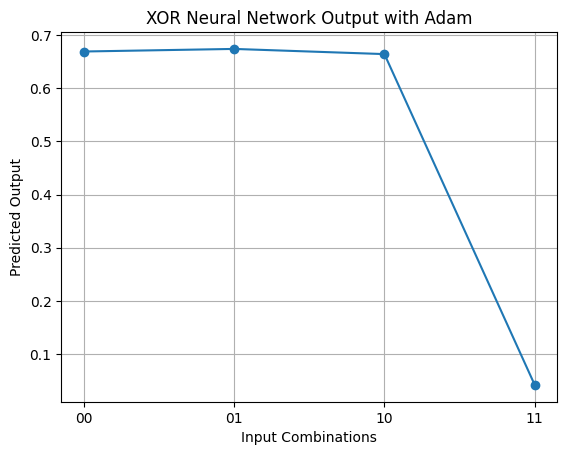

Final Accuracy with Adam: 75.00%


In [6]:
# prompt: Can you give me RMSprop and Adam accuracy percentage with graph

import numpy as np
import matplotlib.pyplot as plt


# Define the sigmoid activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
  return x * (1 - x)

# Input dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Output dataset
y = np.array([[0], [1], [1], [0]])

# Initialize weights randomly with mean 0
np.random.seed(1)
weights0 = 2 * np.random.random((2, 3)) - 1
weights1 = 2 * np.random.random((3, 1)) - 1

# Training parameters
epochs = 10000
learning_rate = 0.1

# Function to calculate mean squared error
def mse(y_true, y_pred):
  return np.mean(np.square(y_true - y_pred))

# Function to train the neural network with a specific optimizer
def train_with_optimizer(optimizer_name, optimizer_func):
  global weights0, weights1
  weights0 = 2 * np.random.random((2, 3)) - 1
  weights1 = 2 * np.random.random((3, 1)) - 1

  losses = []
  accuracies = []

  for i in range(epochs):
    # Forward propagation
    layer0 = X
    layer1 = sigmoid(np.dot(layer0, weights0))
    layer2 = sigmoid(np.dot(layer1, weights1))

    # Calculate the error
    layer2_error = y - layer2

    # Backpropagation
    layer2_delta = layer2_error * sigmoid_derivative(layer2)
    layer1_error = layer2_delta.dot(weights1.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # Update weights using the specified optimizer
    weights1 = optimizer_func(weights1, layer1, layer2_delta, learning_rate)
    weights0 = optimizer_func(weights0, layer0, layer1_delta, learning_rate)

    # Calculate loss and accuracy
    loss = mse(y, layer2)
    losses.append(loss)
    accuracy = np.mean((layer2 > 0.5) == y)
    accuracies.append(accuracy)

  return losses, accuracies, layer2


# Define different optimizer functions
def gradient_descent(weights, input_layer, delta, learning_rate):
  return weights + input_layer.T.dot(delta) * learning_rate

def momentum(weights, input_layer, delta, learning_rate, momentum_factor=0.9):
  velocity = 0
  velocity = momentum_factor * velocity + input_layer.T.dot(delta) * learning_rate
  return weights + velocity

def rmsprop(weights, input_layer, delta, learning_rate, decay_rate=0.9, epsilon=1e-8):
  cache = 0
  cache = decay_rate * cache + (1 - decay_rate) * np.square(input_layer.T.dot(delta))
  return weights + learning_rate * input_layer.T.dot(delta) / (np.sqrt(cache) + epsilon)

def adam(weights, input_layer, delta, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
  m = 0
  v = 0
  m = beta1 * m + (1 - beta1) * input_layer.T.dot(delta)
  v = beta2 * v + (1 - beta2) * np.square(input_layer.T.dot(delta))
  m_hat = m / (1 - beta1)
  v_hat = v / (1 - beta2)
  return weights + learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

# Train the neural network with different optimizers
optimizers = {
    "RMSprop": rmsprop,
    "Adam": adam
}

for optimizer_name, optimizer_func in optimizers.items():
  losses, accuracies, layer2 = train_with_optimizer(optimizer_name, optimizer_func)

  # Plot the loss and accuracy graphs
  plt.figure(figsize=(12, 4))

  plt.subplot(1, 2, 1)
  plt.plot(losses)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title(f'Loss with {optimizer_name}')

  plt.subplot(1, 2, 2)
  plt.plot(accuracies)
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.title(f'Accuracy with {optimizer_name}')

  plt.show()

  print(f"Output after training with {optimizer_name}:")
  print(layer2)

  # Assuming 'layer2' is the output of your neural network after training
  # and it contains the predicted values for the XOR problem.

  # Extract the predicted values
  predicted_output = layer2.flatten()

  # Create a list of input combinations (00, 01, 10, 11)
  input_combinations = ['00', '01', '10', '11']

  # Plot the results
  plt.plot(input_combinations, predicted_output, marker='o')
  plt.xlabel('Input Combinations')
  plt.ylabel('Predicted Output')
  plt.title(f'XOR Neural Network Output with {optimizer_name}')
  plt.grid(True)
  plt.show()

  # Print the final accuracy percentage
  final_accuracy = accuracies[-1] * 100
  print(f"Final Accuracy with {optimizer_name}: {final_accuracy:.2f}%")
